In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data= pd.read_csv("Salary_Data (1).csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
data=data.rename({'YearsExperience':'YExp', 'Salary':'Sal'},axis=1)

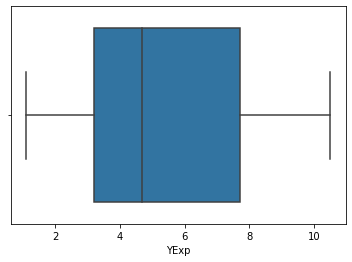

In [5]:
#Checking for Outliers
sns.boxplot(x='YExp', data=data)

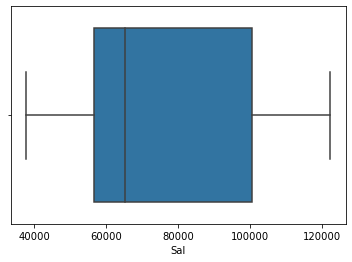

In [6]:

sns.boxplot(x='Sal', data=data)

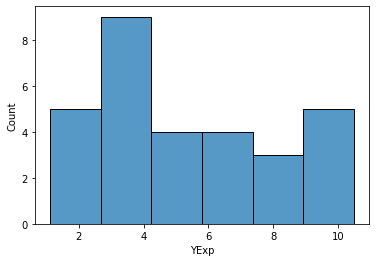

In [7]:
sns.histplot(data.YExp)

In [8]:
#Data Structure 
type(data)
data.shape

(30, 2)

In [9]:
#data types
data.dtypes

YExp    float64
Sal     float64
dtype: object

In [10]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 2)

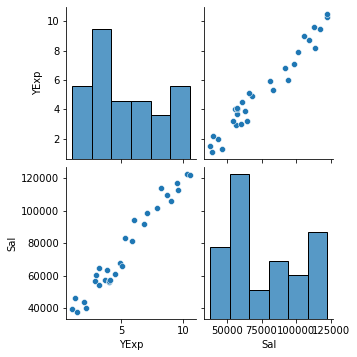

In [11]:
# Create the default pairplot
sns.pairplot(data)

In [12]:
#Correlation
data.corr()

,YExp,Sal
YExp,1.000000,0.978242
Sal,0.978242,1.000000


In [15]:
model = smf.ols("Sal~YExp",data = data).fit()

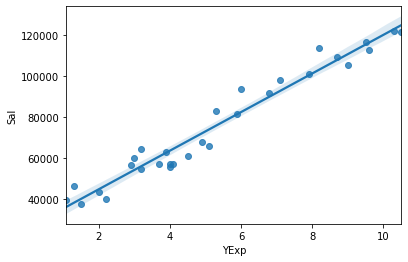

In [16]:
sns.regplot(x="YExp", y="Sal", data=data);

In [17]:
#Coefficients
model.params

Intercept    25792.200199
YExp          9449.962321
dtype: float64

In [18]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    11.346940
YExp         24.950094
dtype: float64 
 Intercept    5.511950e-12
YExp         1.143068e-20
dtype: float64


In [19]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [20]:
newdata=pd.Series([11,11.5])

In [21]:
data_pred=pd.DataFrame(newdata,columns=['YExp'])

In [22]:
model.predict(data_pred)

0    129741.785735
1    134466.766895
dtype: float64